# Comparing error histograms between real and virtual scans

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import glob

Define some functions which load up the raw distances files. 

In [17]:
def load_measurement_file(name):
    """ Load a single txt file with the signed distances from the fitted plane."""
    return np.loadtxt(name)

def load_measurement_files_per_distance(glob_term):
    """ Load multiple distances files and"""
    files = sorted(glob.glob(glob_term))
    measurements = [load_measurement_file(f) for f in files]
    return np.concatenate(measurements)

In [18]:
from thesis.utils import laser_angle_to_id, sorted_angles, laser_id_to_angle

def get_errors_per_laser(run):
    errors_per_laser = {}
    for angle in sorted_angles:
        distances_for_angle = run[np.where(run[:,5] == angle)][:, 0]
        errors_per_laser[laser_angle_to_id[angle]] = distances_for_angle
    return errors_per_laser

In [19]:
real_distances = load_measurement_files_per_distance("/home/branislav/repos/github_indoor++/pcds/error_measurements/distances/5m_2*wall.txt")
virtual_distances = load_measurement_files_per_distance("/home/branislav/repos/thesis/virtual_error_measurements/old_4_second_sweep/5m_0*wall_with_angles.txt")

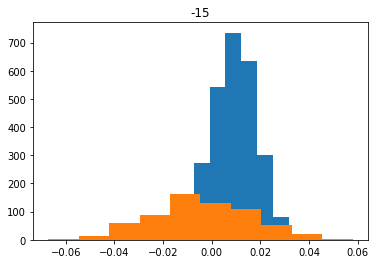

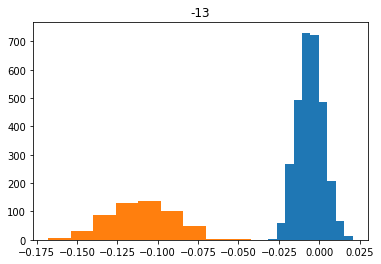

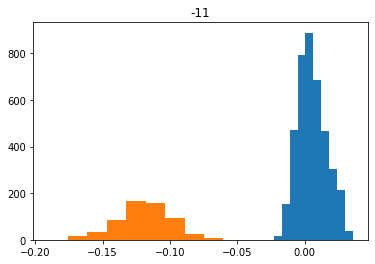

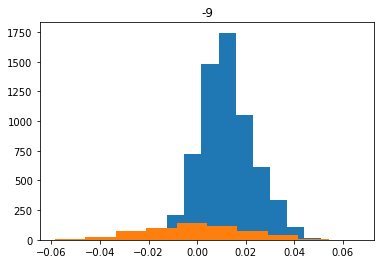

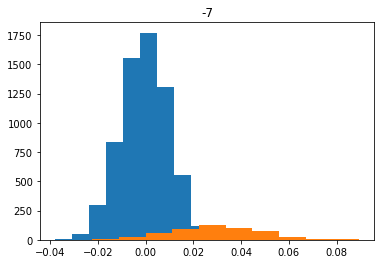

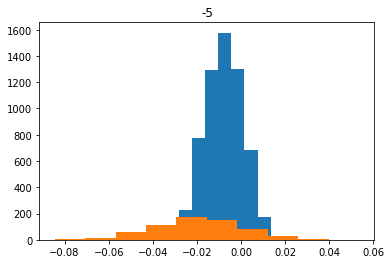

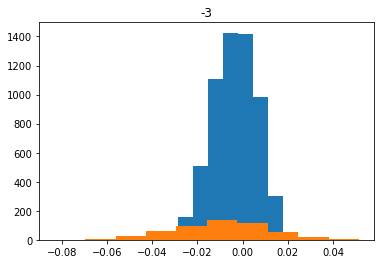

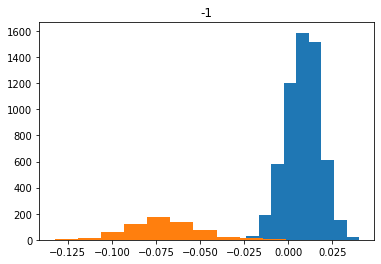

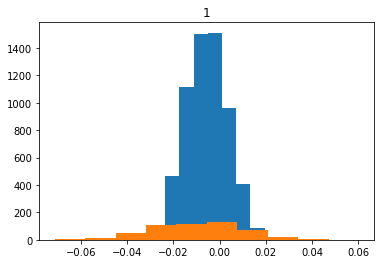

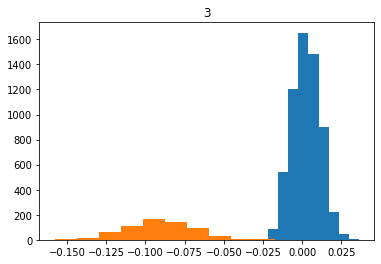

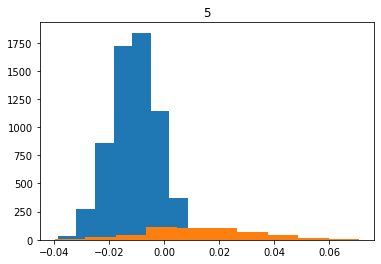

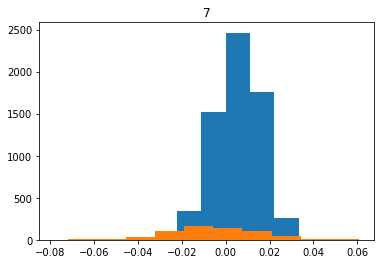

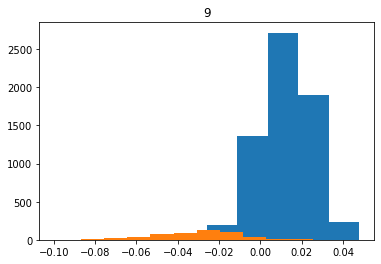

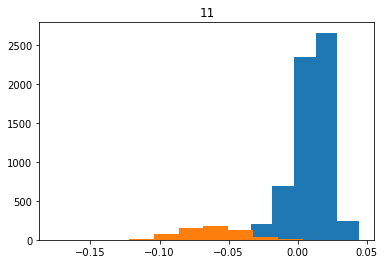

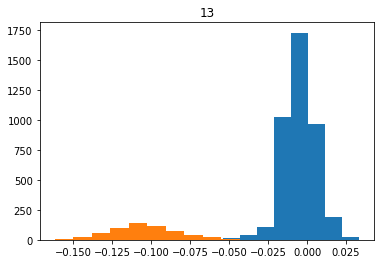

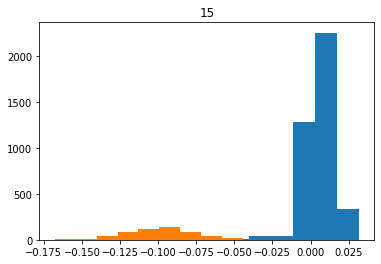

In [20]:
errors = get_errors_per_laser(real_distances)
virtual_errors = get_errors_per_laser(virtual_distances)
for k in virtual_errors.keys():
    plt.hist(errors[k])
    plt.hist(virtual_errors[k])
    plt.title(laser_id_to_angle[k])
    plt.show()